In [28]:
import keras
import numpy as np
import os
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

In [50]:
path = '/home/hussein/Jupyter NoteBooks/Graduation Project/PlantVillage/train/Pepper,_bell___Bacterial_spot'
X_train = []
for dirpath, dirs, files in os.walk(path): 
    for filename in files:
        fname = os.path.join(dirpath,filename)
        img = load_img(fname,target_size =(224,224),color_mode="grayscale")
        img = img_to_array(img)
        X_train.append(img)

X_train = np.array(X_train)
X_train.shape

(797, 224, 224, 1)

In [49]:
X_train = np.repeat(X_train[:,:,:,:],3,-1)
X_train.shape

(797, 256, 256, 3)

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import layers
from time import perf_counter 
import keras
import os

In [2]:
model = keras.models.load_model('model.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 250, 250, 3)       12        
_________________________________________________________________
conv2d (Conv2D)              (None, 248, 248, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 124, 124, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 122, 122, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 59, 59, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 29, 29, 128)       0

In [3]:
## Defining batch specfications
batch_size = 100
img_height = 250
img_width = 250

In [4]:
!cd PlantVillage
!ls PlantVillage

/bin/bash: line 1: cd: PlantVillage: No such file or directory
ls: cannot access 'PlantVillage': No such file or directory


In [5]:
## loading training set
training_ds = keras.preprocessing.image_dataset_from_directory(
    '/run/media/hussein/Others/CS/4th year/1/New_Project/PlantVillage/train',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

Found 43444 files belonging to 38 classes.


In [6]:
## loading validation dataset
validation_ds =  tf.keras.preprocessing.image_dataset_from_directory(
    '/run/media/hussein/Others/CS/4th year/1/New_Project/PlantVillage/val',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size)

Found 10861 files belonging to 38 classes.


In [7]:
class_names = training_ds.class_names

In [8]:
## lets train our CNN
# history = MyCnn.fit(training_ds,validation_data= validation_ds,epochs = 5)

In [9]:
# plt.plot(model.history['loss'], label = 'training loss')
# plt.plot(model.history['accuracy'], label = 'training accuracy')
# plt.legend()

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


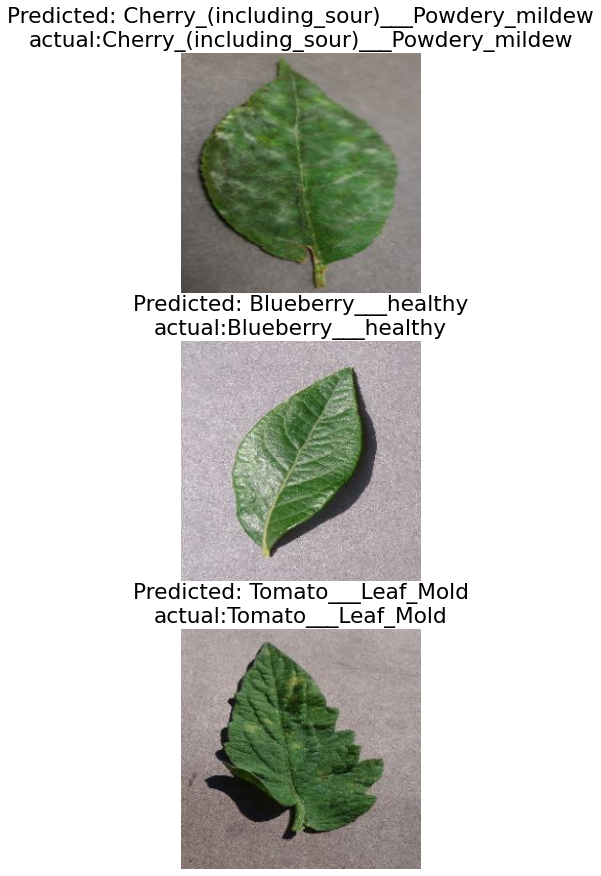

In [10]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 18}

plt.rc('font', **font)
AccuracyVector = []
plt.figure(figsize=(15, 15))
for images, labels in validation_ds.take(1):
    predictions = model.predict(images)
    predlabel = []
    prdlbl = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(3):
        ax = plt.subplot(3, 1, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Predicted: '+ predlabel[i]+'\nactual:'+class_names[labels[i]] )
        plt.axis('off')
        plt.grid(True)

In [11]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [12]:
# download with FileLink:
# –from IPython.display import FileLink
# –FileLink(‘testing.pth’)

In [14]:
from tensorflow import lite
converter = lite.TFLiteConverter.from_keras_model(model)

tfModel = converter.convert()
with open('Green Doctor.tflite','wb') as file:
    file.write(tfModel)

INFO:tensorflow:Assets written to: /tmp/tmpag00f8p6/assets
